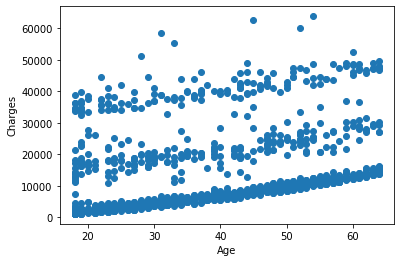

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# импортируем необходмимые библиотеки
import numpy as np
import pandas as pd
 
# creating a data frame
df = pd.read_csv("insurance.csv")
df.dropna(axis = 0, how ='any') 
df.describe(include = "all")
df.loc[(df['sex'] == 'female'), 'sex' ] = 0
df.loc[(df['sex'] == 'male'), 'sex' ] = 1

df.loc[(df['smoker'] == 'yes'), 'smoker' ] = 1
df.loc[(df['smoker'] == 'no'), 'smoker' ] = 0

df.loc[(df['region'] == 'southwest'), 'region' ] = 0
df.loc[(df['region'] == 'northwest'), 'region' ] = 1
df.loc[(df['region'] == 'southeast'), 'region' ] = 2
df.loc[(df['region'] == 'northeast'), 'region' ] = 3

#print(df.head())
#df = df.drop(columns=["sex"])
#df = df.drop(columns=[""])
x=df.drop(columns=["charges"])
y=df.charges

fig, ax = plt.subplots()
plt.xlabel("Age")
plt.ylabel("Charges")
ax.scatter(x['age'], y)

plt.show()
df


In [5]:
#df.dtypes

df.nunique()

age           47
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (1137, 6), (1137,)
Test dataset size: (201, 6), (201,)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
print('Уравнение: ', model.coef_[0] ,'* age + ', model.coef_[1], '* bmi + ',model.coef_[2],'* children + ',model.coef_[3], '* smoker + ',model.coef_[4], '* region + ')


Веса всех признаков (w1):  [  254.57935144  -157.19309453   308.80219556   548.49256313
 23725.13334328   300.26453504]
Свободный коэффицент уравнения w0: -12062.282674993774
Уравнение:  254.57935143791283 * age +  -157.1930945286541 * bmi +  308.80219556460696 * children +  548.4925631271014 * smoker +  23725.133343281883 * region + 


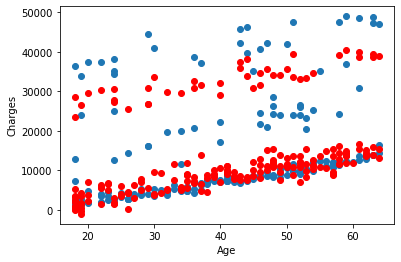

In [20]:
# визуализация уравнения 
y_pred = model.predict(X_test)
plt.scatter(X_test['age'], y_test)
plt.scatter(X_test['age'], y_pred, color='red');
plt.xlabel("Age")
plt.ylabel("Charges")

plt.show()


In [21]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4165.451011105858
Mean Squared Error: 37340161.34653282
R2 score: 0.7675817183368742
